## 1. 이미지에서 얼굴 crop

In [1]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dir_path = os.getenv('HOME')+"/aiffel/exploration/data/ex5_Image/celebrity"

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

## 2. crop한 얼굴이미지의 임베딩

In [3]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [4]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    del_name = ["개리", "김대명", "도아", "드웨인 존슨", "마동석", "사무엘 L 잭슨", 
                "신비", "신태용", "유아", "이승환", "이용진", "이희준","전소미", "한효주", 
                "bush", "비니", "씨잼", "이명박", "최민식", "biden", "산들", "목진화", "영알남", "이말년"]
    
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        
        if file.split(".")[0] in del_name:
            continue
        face = get_cropped_face(image_file)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            name = os.path.splitext(file)[0]
            embedding_dict[name] = embedding[0]
        
    return embedding_dict

In [5]:
embedding_dict = get_face_embedding_dict(dir_path)

## 3. 벡터끼리의 거리 구하기(비슷한 정도를 나타냄)

In [6]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [7]:
get_distance("jiwoo0", "jiwoo1")

0.3412031156299035

내 사진들끼리는 비교적 가까움을 알 수 있었다.

## 4. 얼굴간 거리 비교를 통해 가장 가까운 이미지 찾기

In [8]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [9]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_dict = dict(sorted(embedding_dict.items(), key = lambda x : sort_key_func(x[0])))
    for index, key in enumerate(sorted_dict.keys()):
        if key == "jiwoo0" or key == "jiwoo1":
            continue
        if index + 1 <= top + 2:
            distance = get_distance(name, key)
            print(f"순위 {index - 1} : {key}, {distance}")

In [10]:
get_nearest_face("jiwoo0")

순위 1 : 박명수, 0.3741970613356474
순위 2 : 이승철, 0.3986431464978788
순위 3 : 박해일, 0.4131532913616255
순위 4 : 대도서관, 0.41383465116971024
순위 5 : 조정치, 0.4246706346644485


## 5. 시각화

In [11]:
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
from matplotlib import rc
from PIL import Image


In [12]:
del embedding_dict["jiwoo1"] #내 사진중 하나 제거하여 중복된 인물을 제거한다

In [13]:
rc('font', family="NanumGothic")

In [14]:
def get_file_path(dir_path, name): #이름에 해당하는 절대경로를 만들어 준다
    file_list = os.listdir(dir_path)
    for index, file in enumerate(file_list):
        if name == file.split(".")[0] :
            file_path = os.path.join(dir_path, file)
    return file_path

In [15]:
def display_celebrity(name, top = 5):
    plt.figure(figsize = (18, 12))
    sort_key_func = get_sort_key_func(name)
    
    
    sorted_dict = dict(sorted(embedding_dict.items(), key = lambda x : sort_key_func(x[0])))
    for index, key in enumerate(sorted_dict.keys()):
            
        if index + 1 <= top + 1:
            plt.subplot(1,top + 1, index+1)
            img = Image.open(get_file_path(dir_path, key))
            img_resize = img.resize((256, 256))
            plt.imshow(img_resize)
            if name == key:
                plt.title("비교할 사진")
                plt.axis('off')
                continue
            title = f'{index}순위 : {key}'       
            plt.title(title)
            plt.axis('off')
            
            
            

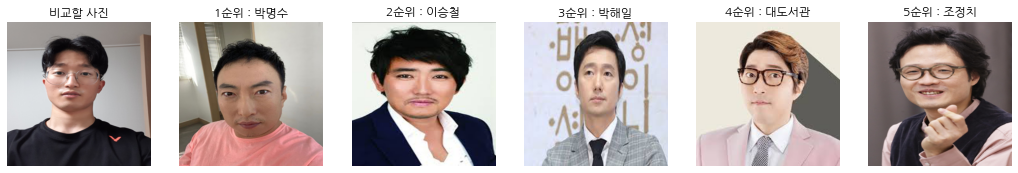

In [16]:
display_celebrity("jiwoo0")

## 회고

가장 어려웠던 점은 초기에 사진에서 얼굴을 인식을 하지 못해 인식을 못하는 이미지를 찾아야했었다는 것이다.

이 프로젝트를 진행하면서 얼굴이미지를 벡터화시키는 라이브러리를 통해 두 이미지 사이의 비슷한 정도를 찾아낸다라는 개념이 신선했던 것 같다. 보다 재밌는 시각화를 하지 못한 것은 아쉬우나 나중에 기회가 된다면 보다 시각화 또한 좀 더 신경써서 진행하고 싶다.